# Analysis for the learning of the 3d dynamics with alpha and mu

In [3]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,7)

alphas = [-8, -6, -4, -2, 0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
n_alphas = len(alphas)
n_actions = 3

fs = 15
title_fs = 18
legend_fs = 12
label_fs = 16
ticks_fs = 14

In [4]:
idx = 1
cQ = pd.read_csv("cQ_matrix3dmu_"+str(idx)+".txt")
crew = pd.read_csv("crewards3dmu_"+str(idx)+".txt")
cout = pd.read_csv("out3dmu_"+str(idx)+".txt")
cQ_count = pd.read_csv("cQ_counter3dmu_"+str(idx)+".txt")

## 1) Q matrix

In [5]:
last_mat = cQ[cQ.episode == cQ.episode.max()]
last_mat.pop("episode")
last_mat.pop("alpha_idx")
last_mat.pop("mu_idx")
last_mat.pop("action_alpha")
last_mat.pop("action_mu")

last_mat.to_csv("final_matrix.txt", index=False, header=False)

In [4]:
cQ.tail(4)

,episode,alpha_idx,mu_idx,action_alpha,action_mu,Q_value
879251,49999,14,12,1,2,0.0
879252,49999,14,12,2,0,2500.0
879253,49999,14,12,2,1,2500.0
879254,49999,14,12,2,2,0.0


In [6]:
num_mu = 13
mu_vals = [-0.174532925, -0.13962634016, -0.10471975512, -0.06981317008, -0.03490658504, -0.01745329252, 0., 0.01745329252, 0.03490658504, 0.06981317008, 0.10471975512, 0.13962634016, 0.174532925]
num_alpha_actions = 3

In [4]:
fig, axs = plt.subplots(num_mu*3, num_alpha_actions, sharex=True, sharey=True, figsize=(6*num_alpha_actions, 4*num_mu*3), gridspec_kw={'wspace': 0, 'hspace':0})

colors1 = ['darkorange', 'blue', 'yellow', 'purple', 'turquoise', 'brown', 'mediumorchid', 'green', 'darkolivegreen', \
         'hotpink', 'dodgerblue', 'chocolate', 'darkslategrey', 'rosybrown', 'tab:red']

for mu in range(0,num_mu):
    print("mu=", mu)
    for mu_action in range(0,3):
        df = cQ[(cQ['mu_idx']==mu) & (cQ['action_mu'] == mu_action) ]
        
        for alph in range(0,15):
            
            df0 = df.loc[df['alpha_idx'] == alph]
            
            df1 = df0.loc[df0['action_alpha']==0]

            axs[mu*3+mu_action,0].plot(df1['episode'], df1['Q_value'], label = str(alphas[alph]), color = colors1[alph])
            axs[mu*3+mu_action,0].set_ylabel("mu idx= "+ str(mu)+ ", mu value="+ str(mu_vals[mu])+ ",\n mu action="+str(mu_action), fontsize=15)
            
            df1 = df0.loc[df0['action_alpha']==1]
            axs[mu*3+mu_action,1].plot(df1['episode'], df1['Q_value'], label = str(alphas[alph]), color = colors1[alph])
        
            df1 = df0.loc[df0['action_alpha']==2]
            axs[mu*3+mu_action,2].plot(df1['episode'], df1['Q_value'], label = str(alphas[alph]), color = colors1[alph])
        
            axs[mu*3+mu_action,0].set_ylim(-300,1000)
            axs[mu*3+mu_action,1].set_ylim(-300,1000)
            axs[mu*3+mu_action,2].set_ylim(-300,1000)
            
            axs[mu*3+mu_action,0].grid(b=True)
            axs[mu*3+mu_action,1].grid(b=True)
            axs[mu*3+mu_action,2].grid(b=True)
            
        axs[0,0].set_title("attack angle action=0", fontsize=17)
        axs[0,1].set_title("attack angle action=1", fontsize=17)
        axs[0,2].set_title("attack angle action=2", fontsize=17)

NameError: name 'num_mu' is not defined

In [8]:
for i in range(0,10000,80):
    aa = cQ[cQ.episode == i]
    print(i, max(aa.Q_value.values))

0 2535.295004
80 2515.902779
160 2540.353187
240 2544.38845
320 2568.988149
400 2551.9926100000002
480 2624.0131469999997
560 2631.396409
640 2735.397122
720 2578.917843
800 2547.162436
880 2569.291102
960 2584.608571
1040 2659.86044
1120 2659.86044
1200 2659.86044
1280 2659.86044
1360 2704.261226
1440 2704.261226
1520 2704.261226
1600 2704.261226
1680 2675.6752420000003
1760 2658.5326489999998
1840 2658.5326489999998
1920 2658.5326489999998
2000 2658.5326489999998
2080 2658.5326489999998
2160 2658.5326489999998
2240 2658.5326489999998
2320 2658.5326489999998
2400 2658.5326489999998
2480 2658.5326489999998
2560 2658.5326489999998
2640 2658.5326489999998
2720 2658.5326489999998
2800 2505.010211
2880 2505.010211
2960 2500.0
3040 2500.0
3120 2500.0
3200 2500.0
3280 2500.0
3360 2500.0
3440 2500.0
3520 2500.0
3600 2500.0
3680 2500.0
3760 2500.0
3840 2500.0
3920 2500.0
4000 2500.0
4080 2500.0
4160 2500.0
4240 2500.0
4320 2500.0
4400 2500.0
4480 2500.0
4560 2500.0
4640 2500.0
4720 2500.0
4800

## Rewards

In [3]:
crew.head(2)

,episode,epsilon,Alpha,steps,decision_time,return,final_alpha,final_mu
0,0,0.001,0.6,146506,1000,0.000000,2.0,5.0
1,1,0.001,0.6,125668,1000,0.000772,2.0,6.0


In [3]:
changes_cart = [0] + [idx for idx, (i, j) in enumerate(zip(crew['Alpha'], crew['Alpha'][1:]), 1) if i != j]
print(changes_cart)
print(crew.Alpha.unique())


changes_cart = [0] + [idx for idx, (i, j) in enumerate(zip(crew['epsilon'], crew['epsilon'][1:]), 1) if i != j]
print(changes_cart)
print(crew.epsilon.unique())

[0, 50000, 90000]
[0.6  0.1  0.01]
[0, 30000, 70000, 99850]
[1.e-03 1.e-04 1.e-05 0.e+00]


250


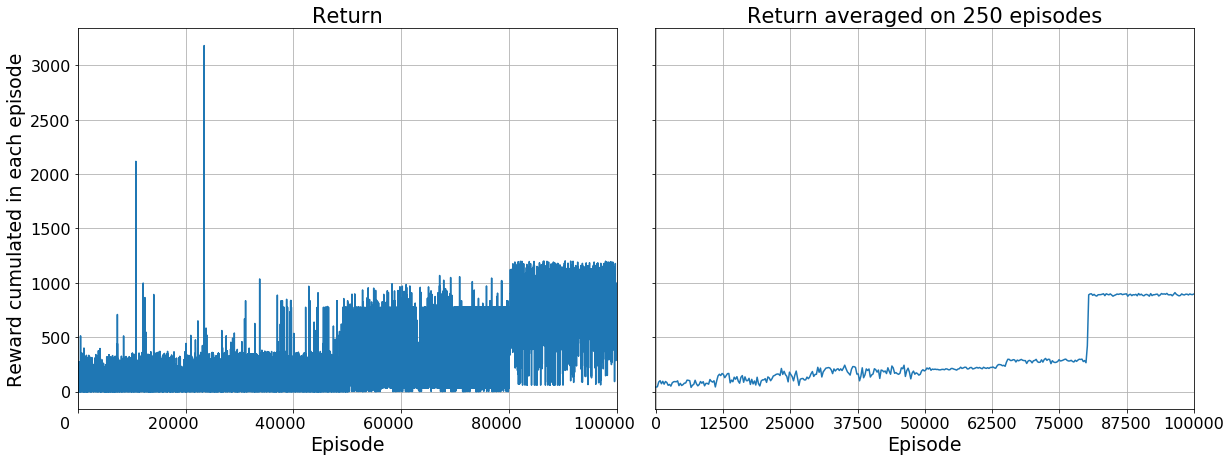

In [7]:
#Mean growth of returns
num_blocks = 400
data_per_block = int(len(crew)/num_blocks)

print(data_per_block)
cmean = []
for i in range(0,num_blocks):
    #print(i*n_data,i*n_data+n_data)
    cmean.append(np.mean(crew['return'][i*data_per_block:i*data_per_block+data_per_block]))
   

fig, axs = plt.subplots(1, 2, figsize=(20, 7), sharey=True, gridspec_kw={'wspace': 0.07})

#fig.suptitle("Return", fontsize = title_fs)

axs[0].plot(crew['episode'], crew['return'])
axs[0].set_title("Return", fontsize=21)
axs[0].grid(b=True)
axs[0].set_xlim(-1, 100000)
axs[0].set_xlabel("Episode", fontsize=19)
axs[0].tick_params(axis='both', labelsize=16)
axs[0].set_ylabel("Reward cumulated in each episode", fontsize=19)
axs[0].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: ('%g     ') % (x)))

axs[1].plot(np.linspace(0, num_blocks, num_blocks), cmean)
axs[1].set_title("Return averaged on " + str(data_per_block) + " episodes", fontsize=21)
axs[1].set_xlim(-1, num_blocks)
axs[1].set_xlabel("Episode", fontsize=19)
axs[1].tick_params(axis='both', labelsize=16)
axs[1].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: ('%g') % (x * data_per_block)))
axs[1].grid(b=True)
#axs[1].set_xticks([0,20000/data_per_block,40000,60000,80000,100000])
#axs[1].set_xticklabels([0,20000,40000,60000,80000,100000])

#plt.savefig('ret_3donlylapha_1.png', bbox_inches='tight')

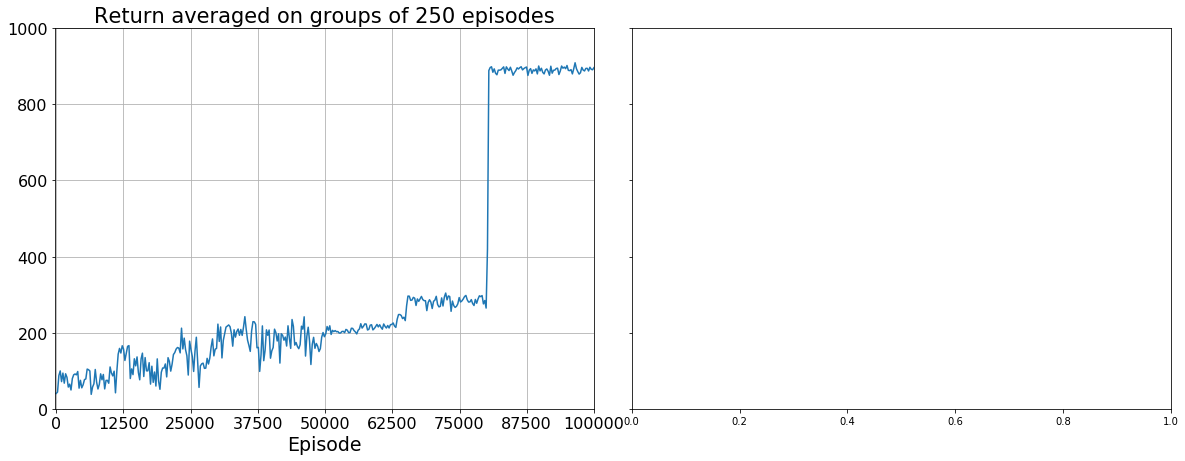

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(20, 7), sharey=True, gridspec_kw={'wspace': 0.07})

#fig.suptitle("Return", fontsize = title_fs)

"""axs[0].plot(crew['episode'], crew['return'])
axs[0].set_title("Return", fontsize=21)
axs[0].grid(b=True)
axs[0].set_xlim(-1, 100000)
axs[0].set_xlabel("Episode", fontsize=19)
axs[0].tick_params(axis='both', labelsize=16)
axs[0].set_ylabel("Reward cumulated in each episode", fontsize=19)
axs[0].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: ('%g     ') % (x)))"""

axs[0].plot(np.linspace(0, num_blocks, num_blocks), cmean)
axs[0].set_title("Return averaged on groups of " + str(data_per_block) + " episodes", fontsize=21)
axs[0].set_xlim(-1, num_blocks)
axs[0].set_ylim(0, 1000)
axs[0].set_xlabel("Episode", fontsize=19)
axs[0].tick_params(axis='both', labelsize=16)
axs[0].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: ('%g') % (x * data_per_block)))
axs[0].grid(b=True)

#plt.savefig("returns_avg.png", dpi = 200, bbox_inches='tight')

In [9]:
a = crew[crew['episode'].between(10000, 35000)]
a[a.steps >= 10000001]

a[a.episode ==  12720]

,episode,epsilon,Alpha,steps,decision_time,return,final_alpha,final_mu
12720,12720,0.001,0.7,338622,1000,178.332898,8,11


In [10]:
# cerco gli episodi in cui arriva ad un return maggiorre di 905.02 senza cadere
for i in range(10000, 35000, 80):
    if (a[a.episode == i]['return'].values[0] > 906 and a[a.episode == i]['steps'].values[0] == 10000001):
        print(i, a[a.episode == i]['return'].values[0], a[a.episode == i]['steps'].values[0])

## Policy and trajectory

In [11]:
cout.tail(3)

,epsiode,step,x_kite,y_kite,z_kite,x_block,y_block,z_block,windx,windy,windz,v_blockx,v_blocky,alpha,alpha_action,mu,mu_action,reward,Q_value
212137,49999,551000,372.478241,-13.562769,0.269258,324.353185,0.0,0.0,10.0,0.0,0.0,5.232609,0.0,14.0,1,-0.174533,1,0.523261,14.926414
212138,49999,552000,372.860628,-14.049911,0.024306,324.874780,0.0,0.0,10.0,0.0,0.0,5.186998,0.0,14.0,1,-0.174533,1,0.518700,14.931647
212139,49999,552161,372.922146,-14.126215,-0.000134,324.958699,0.0,0.0,10.0,0.0,0.0,5.173211,0.0,14.0,1,-0.174533,1,0.517321,14.936833


In [94]:
#cout.epsiode.unique()

In [12]:
df = cout.loc[cout['epsiode'] == 5440]
max(df.v_blockx.values)

ValueError: max() arg is an empty sequence

No handles with labels found to put in legend.


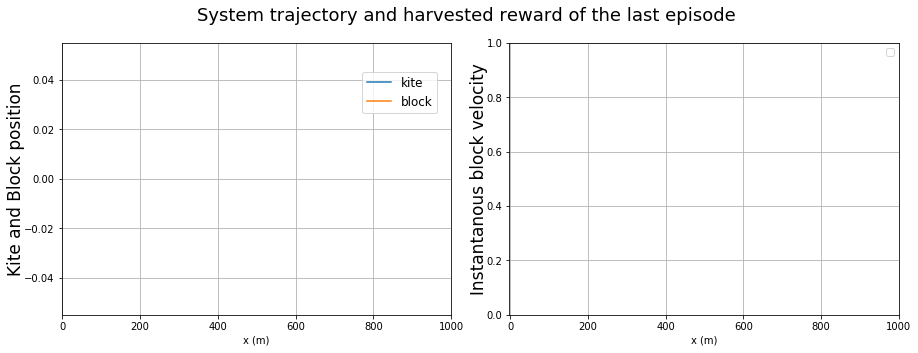

In [13]:
df = cout.loc[cout['epsiode'] == 39999]

fig, axs = plt.subplots(1, 2, figsize=(15, 5), gridspec_kw={'wspace': 0.15})

fig.suptitle('System trajectory and harvested reward of the last episode', fontsize = title_fs)

cout1 = df
axs[0].plot(cout1['x_kite'], cout1['z_kite'], label='kite')
#axs[0].plot(cout1['x_kite'][0], cout1['z_kite'][0], marker='o', color='b')
axs[0].plot(cout1['x_block'], cout1['z_block'], label='block')
#axs[0].plot(cout1['x_block'][0]+0.05, cout1['z_block'][0], marker='o', color='orange')
axs[0].grid(b=True)
plt.legend( loc="upper right")

#axs[1].plot(cout['x_block'], cpol['reward'])
axs[1].grid(b=True)

axs[0].set_xlim(-2,1000)
axs[1].set_xlim(-2,1000)

axs[0].legend(loc=4,mode="", borderaxespad=.5, frameon=True,
        bbox_to_anchor=(-0.02, 0.72, 1., .102), fontsize=legend_fs)

#axs[0].set_title("Trajectory")
#axs[1].set_title("Instantaneous reward")

axs[0].set_ylabel("Kite and Block position", fontsize=17, labelpad=-1)
axs[1].set_ylabel("Instantanous block velocity", fontsize=17, labelpad=-1)

for ax in axs.flat:
    ax.set(xlabel='x (m)')

#fig.savefig('trajectory_reward.png', dpi=400, bbox_inches = 'tight')

In [11]:
#df.pop("epsiode")
df.to_csv("last_ep_noangle.csv", index=False)

## 6) Q matrix counter (to be done)

In [13]:
cQ_count.head(5)

,episode,alpha_idx,mu_idx,action_alpha,action_mu,Q_count_value
0,499999,0,0,0,0,0
1,499999,0,0,0,1,0
2,499999,0,0,0,2,0
3,499999,0,0,1,0,0
4,499999,0,0,1,1,9468


In [24]:
df1 = cQ_count['action_0','action_1', 'action_2']
print(df1)
vmin = 0
vmax = max(df1['action_0'].max(), df1['action_1'].max(), df1['action_2'].max())
#print(vmax)

fig, axs = plt.subplots(ncols=2, gridspec_kw=dict(width_ratios=[7,0.2]),figsize=(7, 7))
sns.set(font_scale=1.1)
sns.heatmap(df1, annot=True, fmt="d", cbar=False, ax=axs[0], vmin=vmin)

axs[0].set_yticklabels(alphas)
axs[0].set_ylabel(r'Attack angle $\alpha$',fontsize=17)
axs[0].set_xlabel("Action",fontsize=17)

axs[0].set_xticklabels(["Diminish", "Keep", "Increase"])

axs[0].tick_params(labelsize=14)

axs[0].set_title("Cartesian")

fig.colorbar(axs[0].collections[0], cax=axs[1])

plt.show()

#fig = plt.get_figure()
#fig.savefig('cQ_matrix_counter.png', dpi=400)

KeyError: ('action_0', 'action_1', 'action_2')

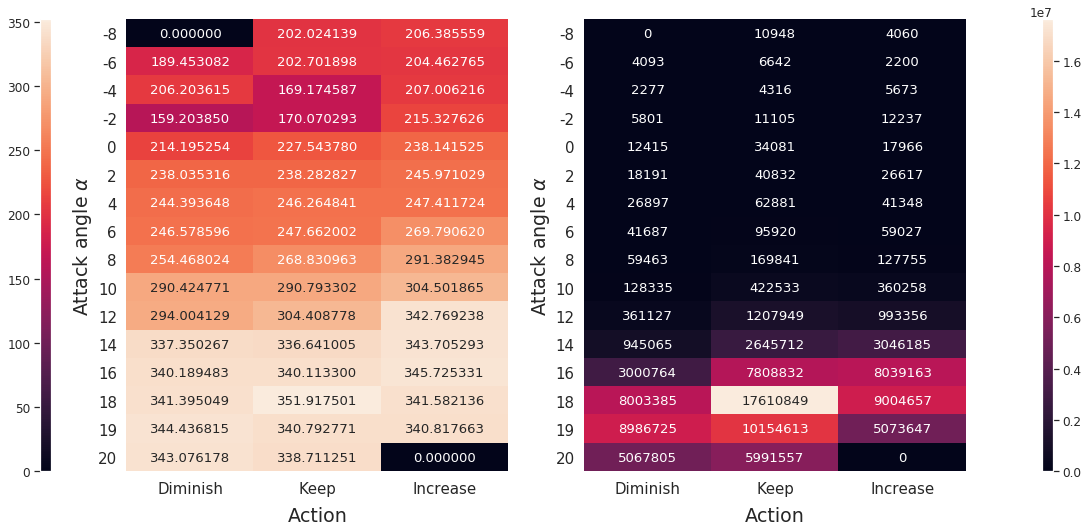

In [41]:
fig, axs = plt.subplots(1, ncols=4, #sharex=True, 
                        gridspec_kw=dict( width_ratios=[0.2,7,7,0.2], height_ratios=[1]), 
                        figsize=(15, 7.5))

sns.heatmap(df1, annot=True, fmt="f", cbar=False, ax=axs[1], vmin=vmin1)
sns.heatmap(df3, annot=True, fmt="d", cbar=False, ax=axs[2], vmin=vmin2)

axs[1].set_xticklabels(["Diminish", "Keep", "Increase"])
axs[2].set_xticklabels(["Diminish", "Keep", "Increase"])
axs[1].set_yticklabels(alphas,rotation='horizontal')
axs[2].set_yticklabels(alphas,rotation='horizontal')

axs[1].set_xlabel("Action",fontsize=19, labelpad=10)
axs[2].set_xlabel("Action",fontsize=19, labelpad=10)

axs[1].tick_params(labelsize=15)
axs[2].tick_params(labelsize=15)

axs[1].set_ylabel(r'Attack angle $\alpha$',fontsize=19)
axs[2].set_ylabel(r'Attack angle $\alpha$',fontsize=19)

fig.colorbar(axs[1].collections[0], cax=axs[0], fraction=0.046,pad=1)
axs[0].yaxis.set_ticks_position('left')
fig.tight_layout() 
fig.colorbar(axs[2].collections[0], cax=axs[3])

#fig.savefig('matrix-and-counter-partial.png', bbox_inches='tight', dpi=500)

In [23]:
m = 1
M = 40
Cl = 1.1 #1.05
Cd = 0.18#0.21
rho = 1.225
g = 9.81
coeff_friction = 0.4
A = 5

In [24]:
v1 = (coeff_friction*(M+m)*g)/(0.5*rho*A*(Cd + Cl*coeff_friction))
np.sqrt(v1)

9.20497332445261

In [25]:
v2 = -(coeff_friction*(M+m)*g)/(0.5*rho*A*(Cd - Cl*coeff_friction))
np.sqrt(v2)

14.214503836197103